In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

In [2]:
gen_fuel_dataset2018 = pd.read_excel(r"EIA923_Schedules_2_3_4_5_M_12_2018_Final_Revision.xlsx", sheet_name="Page 1 Generation and Fuel Data",
                      header=5)
gen_fuel_dataset2019 = pd.read_excel(r"EIA923_2019_Final_Revision.xlsx", sheet_name="Page 1 Generation and Fuel Data",
                      header=5)
gen_fuel_dataset2020 = pd.read_excel(r"EIA923_Schedules_2_3_4_5_M_12_2020_Final_Revision.xlsx", sheet_name="Page 1 Generation and Fuel Data",
                      header=5)
gen_fuel_dataset2021 = pd.read_excel(r"EIA923_Schedules_2_3_4_5_M_12_2021_18FEB2022.xlsx", sheet_name="Page 1 Generation and Fuel Data",
                      header=5)

In [3]:
new_col_names = dict([(colname, "_".join(colname.strip().split("\n")).strip("_").replace(" ", "_").lower()) if colname.find("\n") != -1 else (colname, colname.strip().replace(" ", "_").lower()) for colname in gen_fuel_dataset2018.columns])
gen_fuel_dataset2018 = gen_fuel_dataset2018.rename(columns=new_col_names)
#Rewewable powerplants unit labels being assigned None since they have no 
gen_fuel_dataset2018["physical_unit_label"] = gen_fuel_dataset2018["physical_unit_label"].fillna(value="None")

new_col_names = dict([(colname, "_".join(colname.strip().split("\n")).strip("_").replace(" ", "_").lower()) if colname.find("\n") != -1 else (colname, colname.strip().replace(" ", "_").lower()) for colname in gen_fuel_dataset2019.columns])
gen_fuel_dataset2019 = gen_fuel_dataset2019.rename(columns=new_col_names)
#Rewewable powerplants unit labels being assigned None since they have no 
gen_fuel_dataset2019["physical_unit_label"] = gen_fuel_dataset2019["physical_unit_label"].fillna(value="None")

new_col_names = dict([(colname, "_".join(colname.strip().split("\n")).strip("_").replace(" ", "_").lower()) if colname.find("\n") != -1 else (colname, colname.strip().replace(" ", "_").lower()) for colname in gen_fuel_dataset2020.columns])
gen_fuel_dataset2020 = gen_fuel_dataset2020.rename(columns=new_col_names)
#Rewewable powerplants unit labels being assigned None since they have no 
gen_fuel_dataset2020["physical_unit_label"] = gen_fuel_dataset2020["physical_unit_label"].fillna(value="None")

new_col_names = dict([(colname, "_".join(colname.strip().split("\n")).strip("_").replace(" ", "_").lower()) if colname.find("\n") != -1 else (colname, colname.strip().replace(" ", "_").lower()) for colname in gen_fuel_dataset2021.columns])
gen_fuel_dataset2021 = gen_fuel_dataset2021.rename(columns=new_col_names)
#Rewewable powerplants unit labels being assigned None since they have no 
gen_fuel_dataset2021["physical_unit_label"] = gen_fuel_dataset2021["physical_unit_label"].fillna(value="None")

In [4]:
#Filter out power plants that have 0 Net Generation since they don't contribute to the dataset
# gen_fuel_dataset2018_1 = gen_fuel_dataset2018[gen_fuel_dataset2018["net_generation_(megawatthours)"] != 0]

print(len(gen_fuel_dataset2018[gen_fuel_dataset2018["physical_unit_label"] != "None"]))
print(len(gen_fuel_dataset2018[gen_fuel_dataset2018["physical_unit_label"] == "None"]))

print()
#gen_fuel_dataset2019_1 = gen_fuel_dataset2019[gen_fuel_dataset2019["net_generation_(megawatthours)"] != 0]
#gen_fuel_dataset.loc[0:20,["elec_quantity_june"]]
print(len(gen_fuel_dataset2019[gen_fuel_dataset2019["physical_unit_label"] != "None"]))
print(len(gen_fuel_dataset2019[gen_fuel_dataset2019["physical_unit_label"] == "None"]))

print()

#gen_fuel_dataset2020_1 = gen_fuel_dataset2020[gen_fuel_dataset2020["net_generation_(megawatthours)"] != 0]
#gen_fuel_dataset.loc[0:20,["elec_quantity_june"]]
print(len(gen_fuel_dataset2020[gen_fuel_dataset2020["physical_unit_label"] != "None"]))
print(len(gen_fuel_dataset2020[gen_fuel_dataset2020["physical_unit_label"] == "None"]))

print()
#gen_fuel_dataset2021_1 = gen_fuel_dataset2021[gen_fuel_dataset2021["net_generation_(megawatthours)"] != 0]
#gen_fuel_dataset.loc[0:20,["elec_quantity_june"]]
print(len(gen_fuel_dataset2021[gen_fuel_dataset2021["physical_unit_label"] != "None"]))
print(len(gen_fuel_dataset2021[gen_fuel_dataset2021["physical_unit_label"] == "None"]))



8377
5582

8337
6180

8234
6881

5247
1673


36143 40602


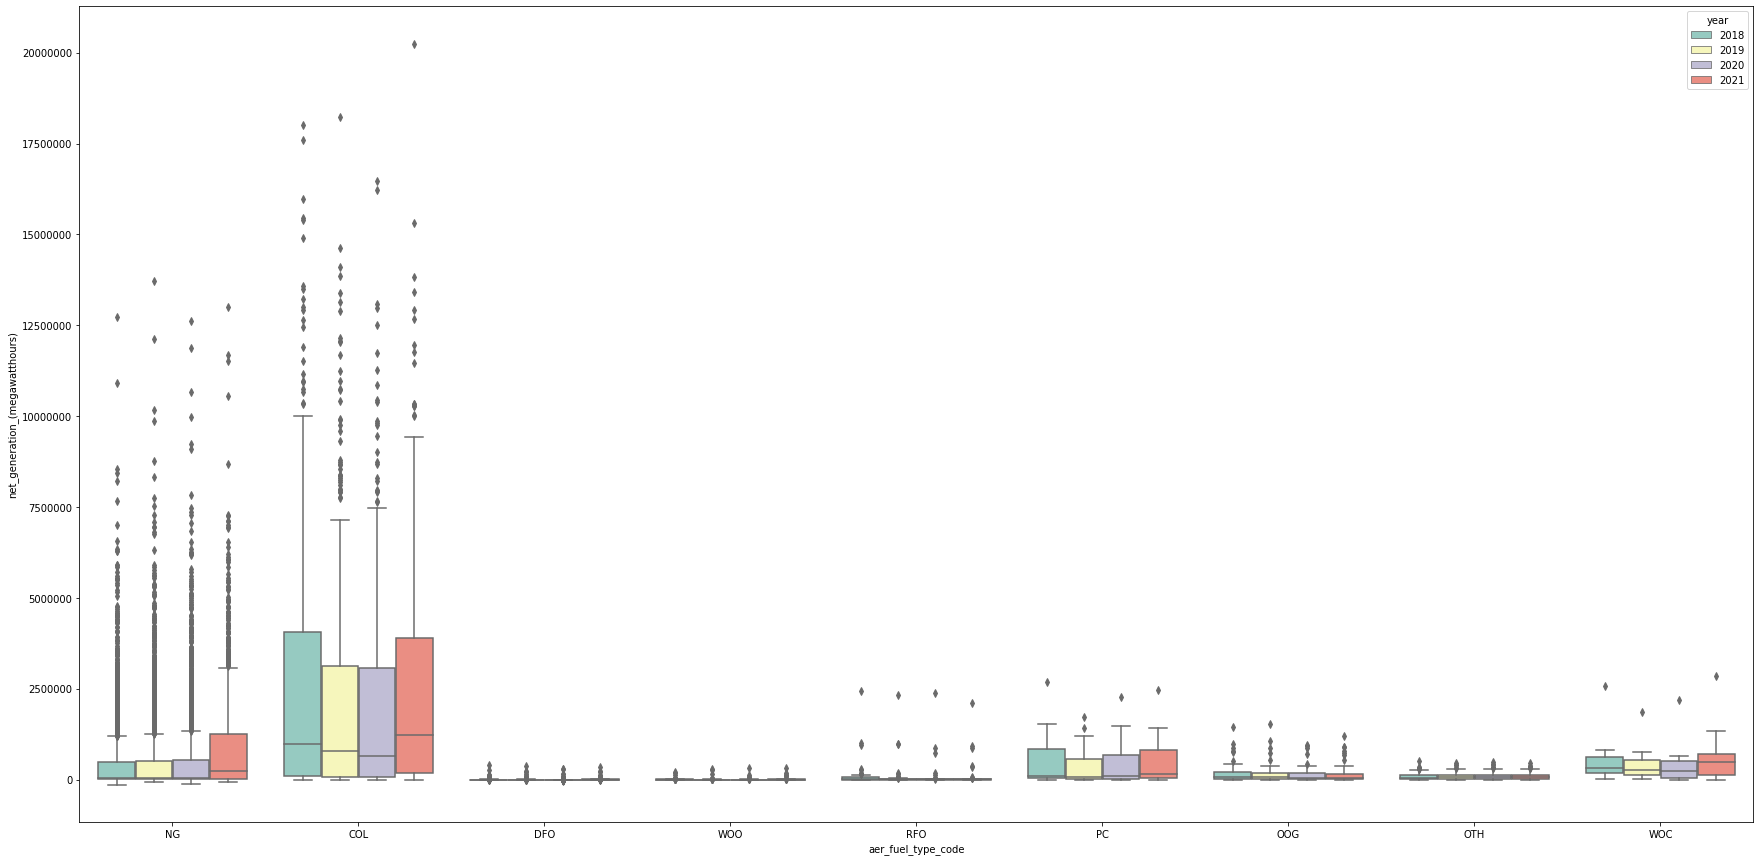

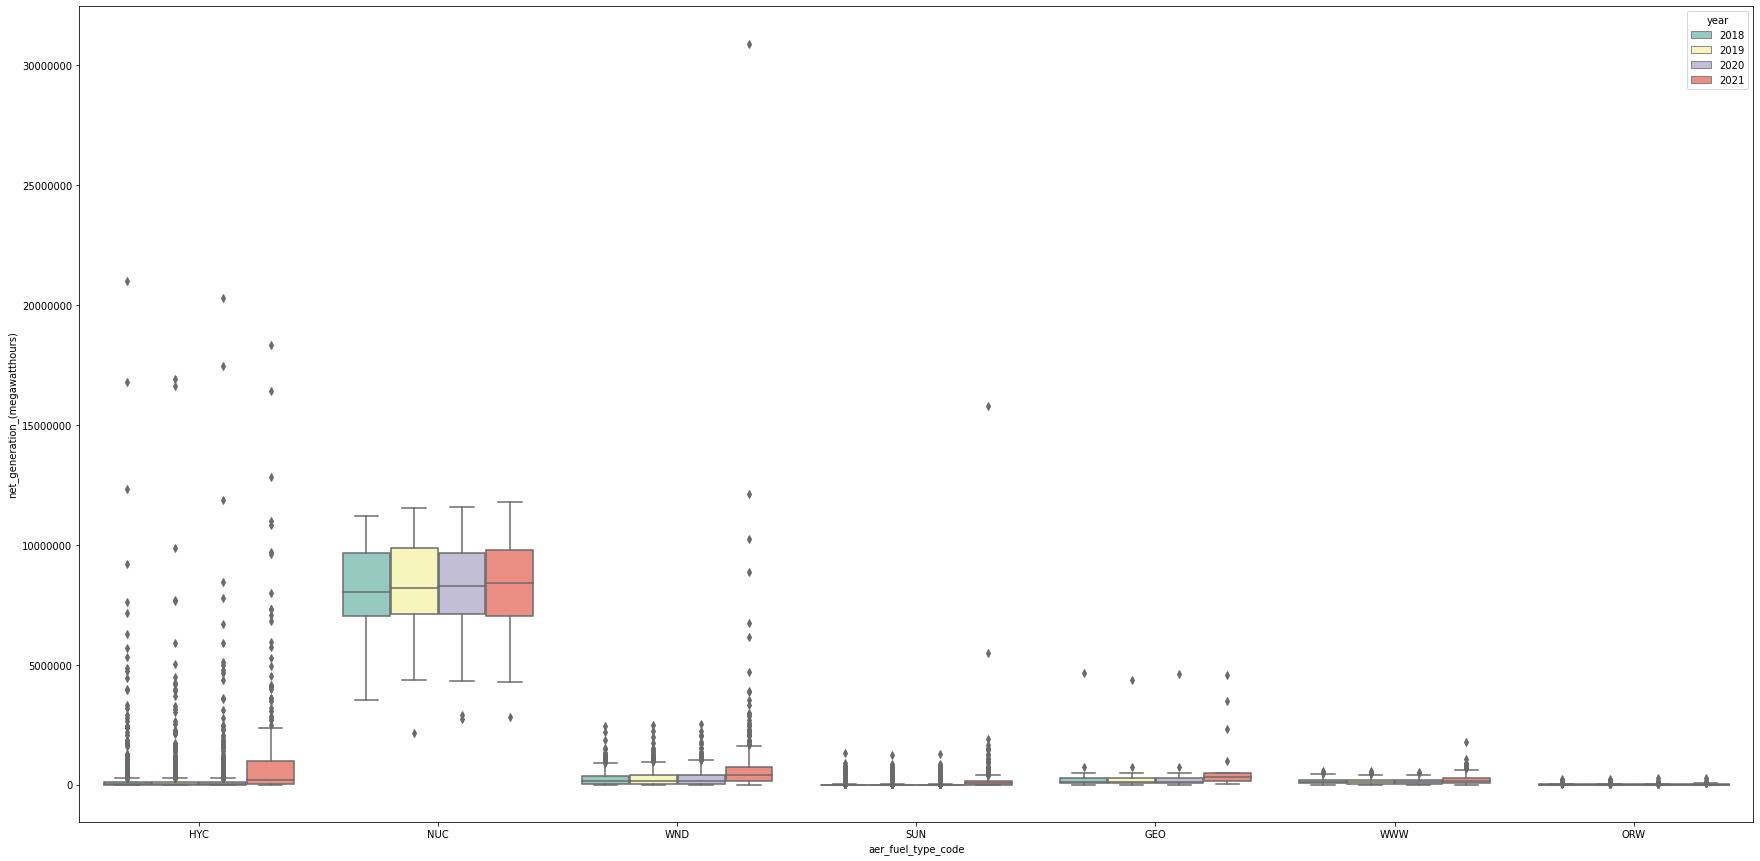

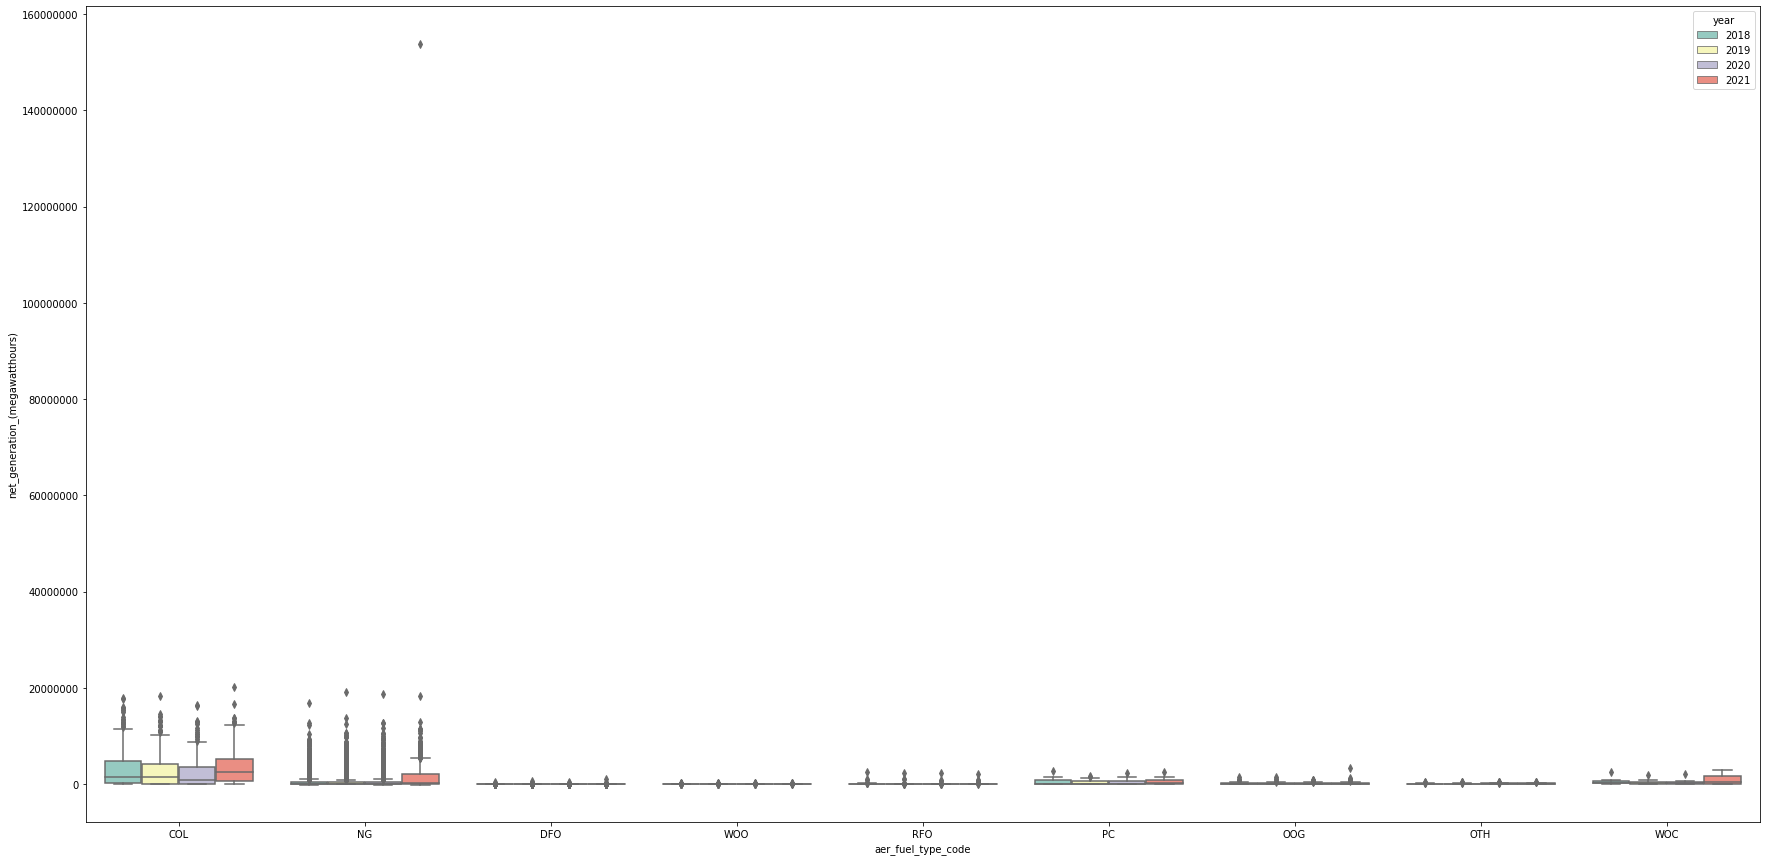

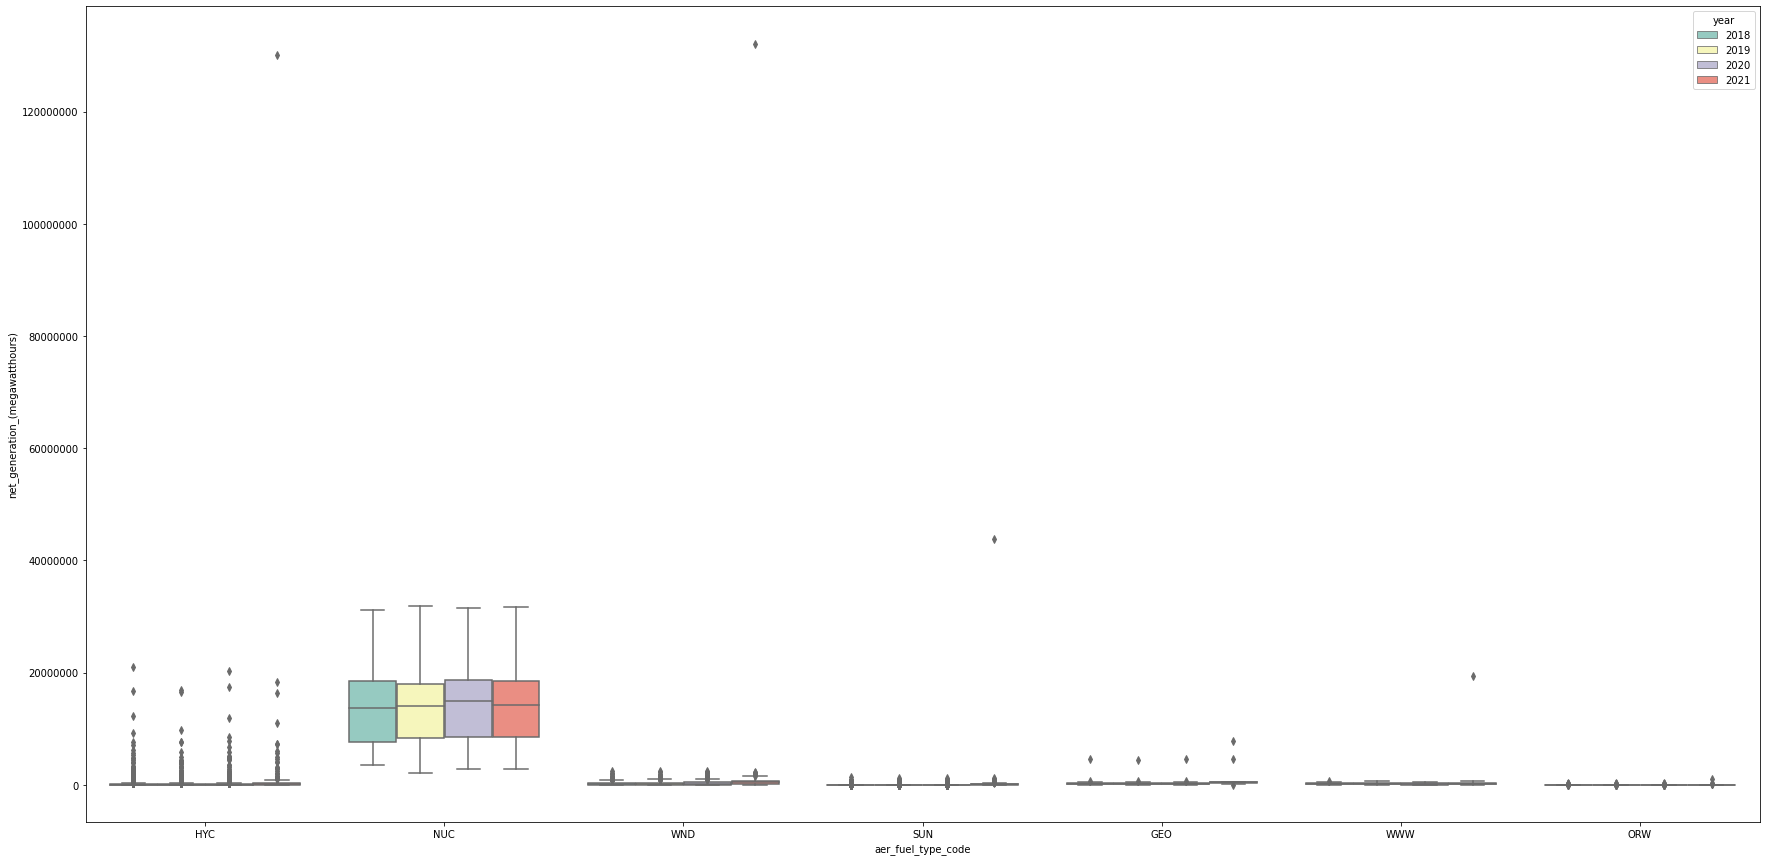

In [86]:
#Aggregate each power plant's net power generation by plant id and AER Fuel Type, and create boxplot
#Getting rid of ambiguous fuel type records so that we can focus only on the renewable and nonrewable fuels being used
renewable_sources_aer = ["SUN", "GEO", "HPS", "HYC", "MLP", "NUC", "ORW", "WND", "WWW"]
nonrenewable_sources_aer = ["COL", "DFO", "NG", "OOG", "PC", "RFO", "WOC", "WOO", "OTH"]
agg_gen_fuel_dataset_2018 = gen_fuel_dataset2018[~(gen_fuel_dataset2018["aer_fuel_type_code"].isin(["OTH"])
                                                 & gen_fuel_dataset2018["reported_fuel_type_code"].isin(["OTH", "PUR", "MWH"]))]
agg_gen_fuel_dataset_2019 = gen_fuel_dataset2019[~(gen_fuel_dataset2019["aer_fuel_type_code"].isin(["OTH"])
                                                 & gen_fuel_dataset2019["reported_fuel_type_code"].isin(["OTH", "PUR", "MWH"]))]
agg_gen_fuel_dataset_2020 = gen_fuel_dataset2020[~(gen_fuel_dataset2020["aer_fuel_type_code"].isin(["OTH"])
                                                 & gen_fuel_dataset2020["reported_fuel_type_code"].isin(["OTH", "PUR", "MWH"]))]
agg_gen_fuel_dataset_2021 = gen_fuel_dataset2021[~(gen_fuel_dataset2021["aer_fuel_type_code"].isin(["OTH"])
                                                 & gen_fuel_dataset2021["reported_fuel_type_code"].isin(["OTH", "PUR", "MWH"]))]


columns_interest = [colname  for colname in gen_fuel_dataset2019.columns if colname.find("elec_quantity") == -1\
                    and colname.find("quantity_") == -1 and colname.find("netgen_") == -1 and colname.find("elec_mmbtu") == -1\
                        and colname.find("mmbtuper_") == -1 and colname.find("tot_mmbtu") == -1 and colname.find("reserved") == -1]
#Selecting columns of interest and removing records where electricity was not generated even though fuel was consumed
agg_gen_fuel_dataset_2018 = agg_gen_fuel_dataset_2018.loc[
    ~(agg_gen_fuel_dataset_2018["net_generation_(megawatthours)"] == 0) & (agg_gen_fuel_dataset_2018["elec_fuel_consumption_mmbtu"] != 0), columns_interest]
agg_gen_fuel_dataset_2019 = agg_gen_fuel_dataset_2019.loc[
    ~(agg_gen_fuel_dataset_2019["net_generation_(megawatthours)"] == 0) & (agg_gen_fuel_dataset_2019["elec_fuel_consumption_mmbtu"] != 0), columns_interest]
agg_gen_fuel_dataset_2020 = agg_gen_fuel_dataset_2020.loc[
    ~(agg_gen_fuel_dataset_2020["net_generation_(megawatthours)"] == 0) & (agg_gen_fuel_dataset_2020["elec_fuel_consumption_mmbtu"] != 0), columns_interest]
agg_gen_fuel_dataset_2021 = agg_gen_fuel_dataset_2021.loc[
    ~(agg_gen_fuel_dataset_2021["net_generation_(megawatthours)"] == 0) & (agg_gen_fuel_dataset_2021["elec_fuel_consumption_mmbtu"] != 0), columns_interest]
agg_gen_fuel_dataset = pd.concat([agg_gen_fuel_dataset_2018, agg_gen_fuel_dataset_2019, agg_gen_fuel_dataset_2020, agg_gen_fuel_dataset_2021])


plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="net_generation_(megawatthours)", hue="year",
                 data=\
                agg_gen_fuel_dataset[agg_gen_fuel_dataset["aer_fuel_type_code"].isin(nonrenewable_sources_aer)], palette="Set3")

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="net_generation_(megawatthours)", hue="year",
                 data=\
                agg_gen_fuel_dataset[agg_gen_fuel_dataset["aer_fuel_type_code"].isin(renewable_sources_aer)], palette="Set3")

agg_gen_fuel_dataset_grouped = agg_gen_fuel_dataset.groupby(["year", "plant_id", 
                            "aer_fuel_type_code"], as_index=False).agg({'net_generation_(megawatthours)':'sum', 'total_fuel_consumption_mmbtu':'sum', "elec_fuel_consumption_mmbtu":"sum"})#.sum(["net_generation_(megawatthours)", "total_fuel_consumption_mmbtu", "elec_fuel_consumption_mmbtu"])
#print(agg_gen_fuel_dataset)

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="net_generation_(megawatthours)", hue="year",
                 data=\
                agg_gen_fuel_dataset_grouped[agg_gen_fuel_dataset_grouped["aer_fuel_type_code"].isin(nonrenewable_sources_aer)], palette="Set3")

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="net_generation_(megawatthours)", hue="year",
                 data=\
                agg_gen_fuel_dataset_grouped[agg_gen_fuel_dataset_grouped["aer_fuel_type_code"].isin(renewable_sources_aer)], palette="Set3")
print(len(agg_gen_fuel_dataset_grouped), len(agg_gen_fuel_dataset))

<AxesSubplot:xlabel='aer_fuel_type_code', ylabel='net_generation_(megawatthours)'>

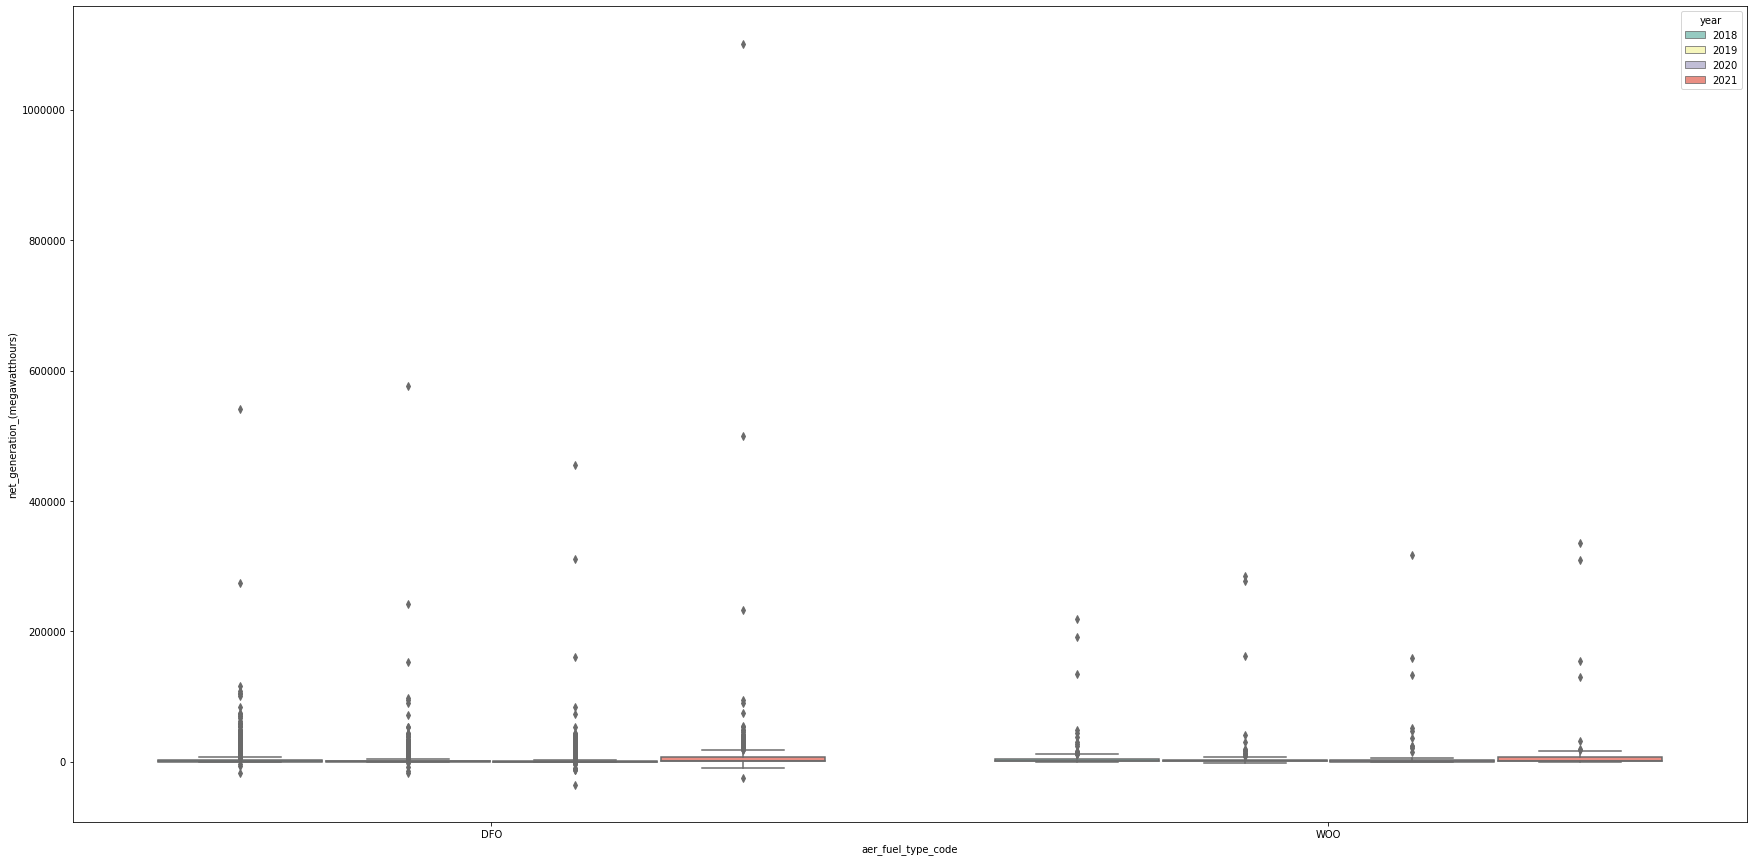

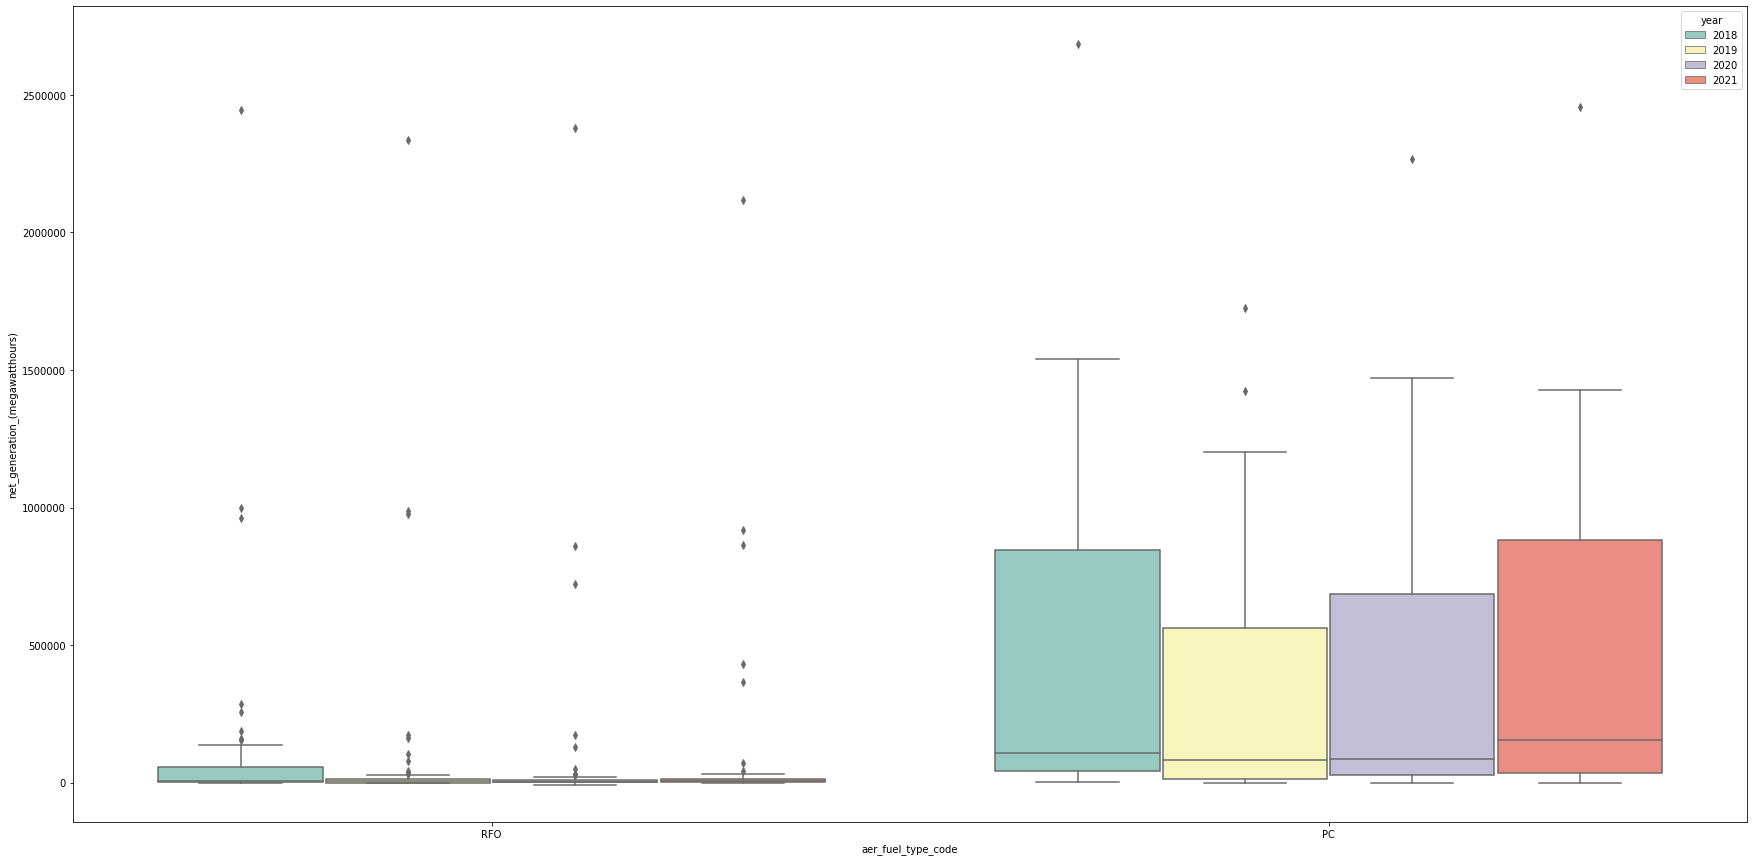

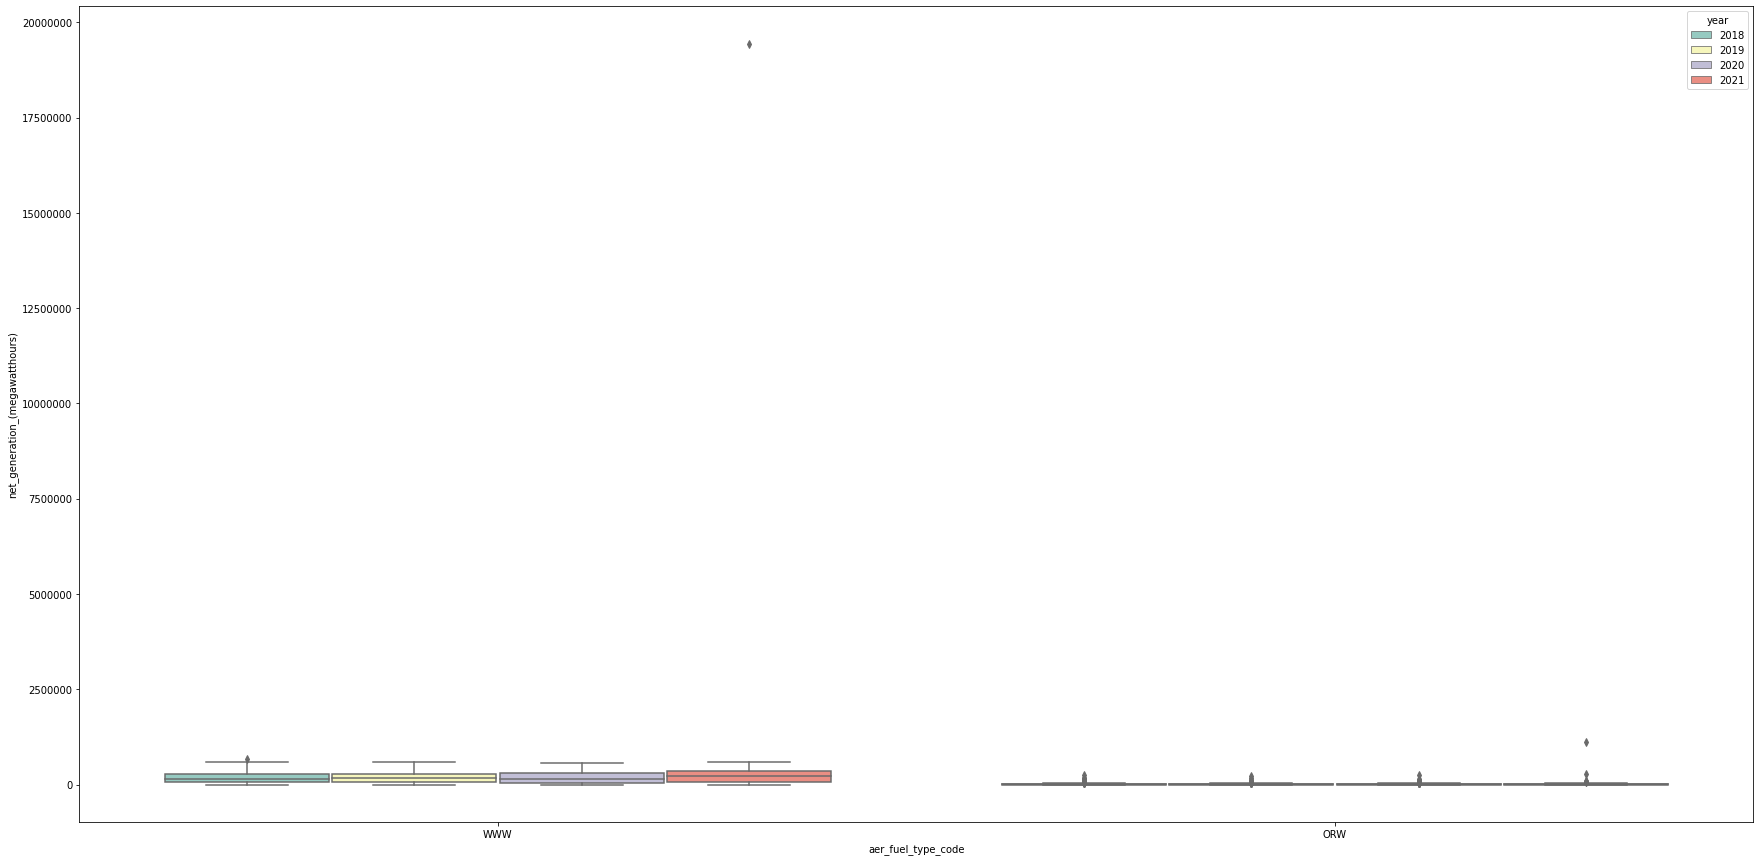

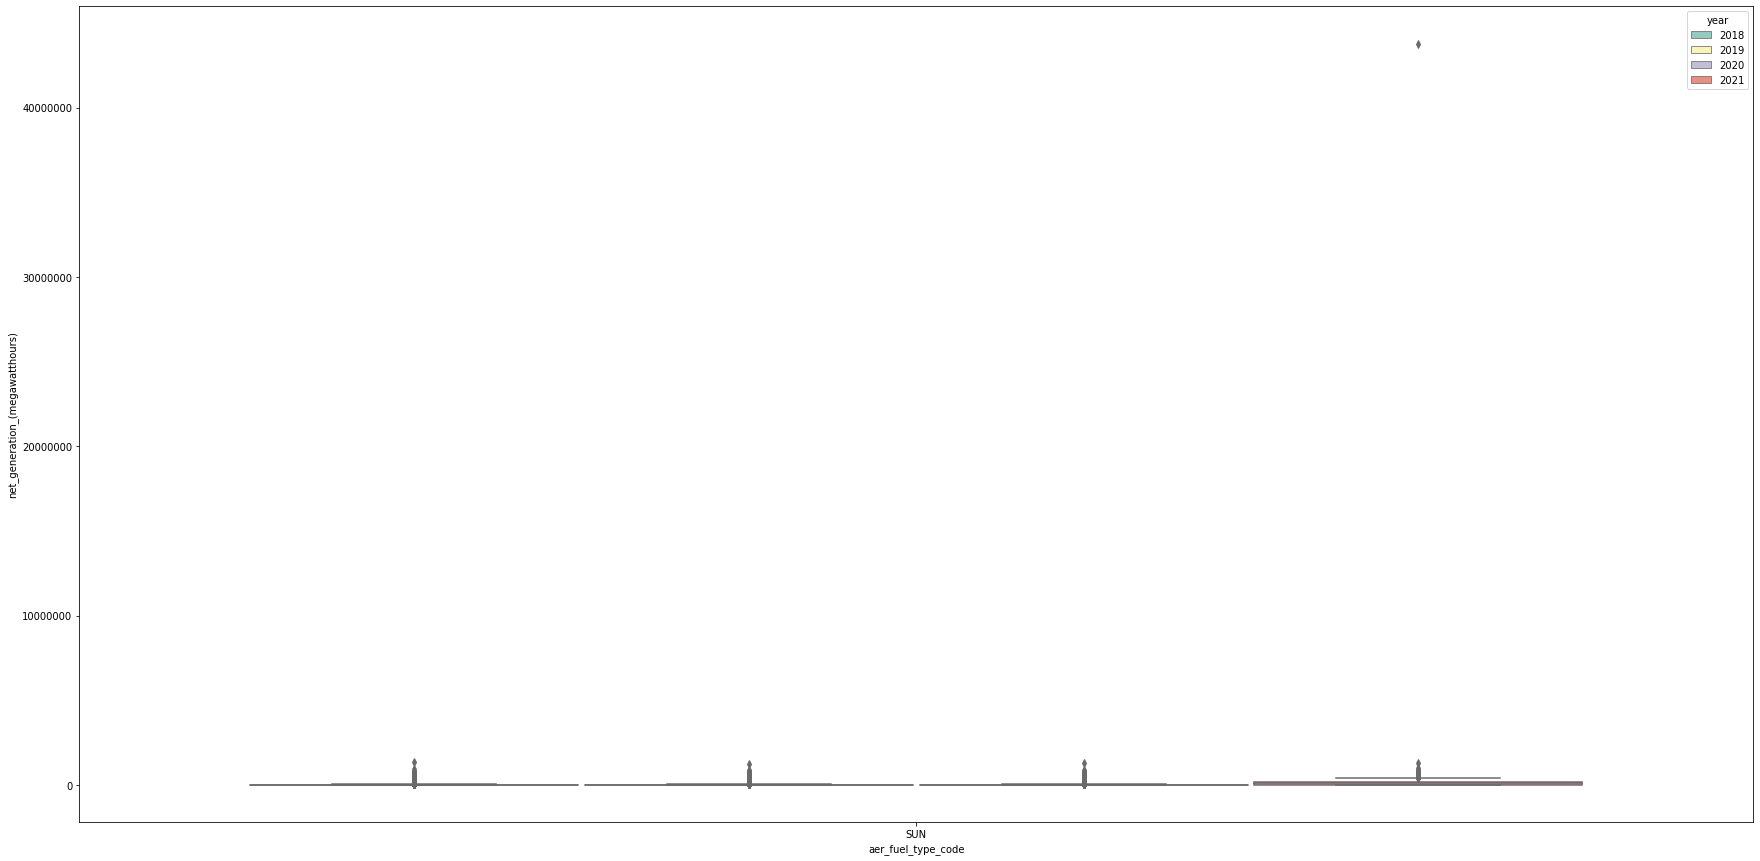

In [87]:
#Closer look at the distributions of net energy generation across energy sources that are on the lower end of the spectrum (DFO, WOO, RFO, PC)
plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="net_generation_(megawatthours)", hue="year",
                 data=\
                agg_gen_fuel_dataset_grouped[agg_gen_fuel_dataset_grouped["aer_fuel_type_code"].isin(["DFO", "WOO"])], palette="Set3")

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="net_generation_(megawatthours)", hue="year",
                 data=\
                agg_gen_fuel_dataset_grouped[agg_gen_fuel_dataset_grouped["aer_fuel_type_code"].isin(["RFO", "PC"])], palette="Set3")

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="net_generation_(megawatthours)", hue="year",
                 data=\
                agg_gen_fuel_dataset_grouped[agg_gen_fuel_dataset_grouped["aer_fuel_type_code"].isin(["ORW", "WWW"])], palette="Set3")


plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="net_generation_(megawatthours)", hue="year",
                 data=\
                agg_gen_fuel_dataset_grouped[agg_gen_fuel_dataset_grouped["aer_fuel_type_code"].isin(["SUN"])], palette="Set3")


In [98]:
agg_gen_fuel_dataset_grouped

,year,plant_id,aer_fuel_type_code,net_generation_(megawatthours),total_fuel_consumption_mmbtu,elec_fuel_consumption_mmbtu
0,2018,3,COL,3.634297e+06,36907314,36907314
1,2018,3,NG,6.830619e+06,48277480,48277480
2,2018,4,HYC,6.879210e+05,6262832,6262832
3,2018,7,NG,1.888770e+05,2583775,2195375
4,2018,8,COL,5.490646e+06,53401128,53401128
...,...,...,...,...,...,...
36138,2021,99999,SUN,4.377702e+07,384055523,384055523
36139,2021,99999,WND,1.321575e+08,1159417352,1159417352
36140,2021,99999,WOC,2.917573e+06,36899184,36099018
36141,2021,99999,WOO,3.360774e+05,4752455,4219180


<AxesSubplot:xlabel='aer_fuel_type_code', ylabel='total_fuel_consumption_mmbtu'>

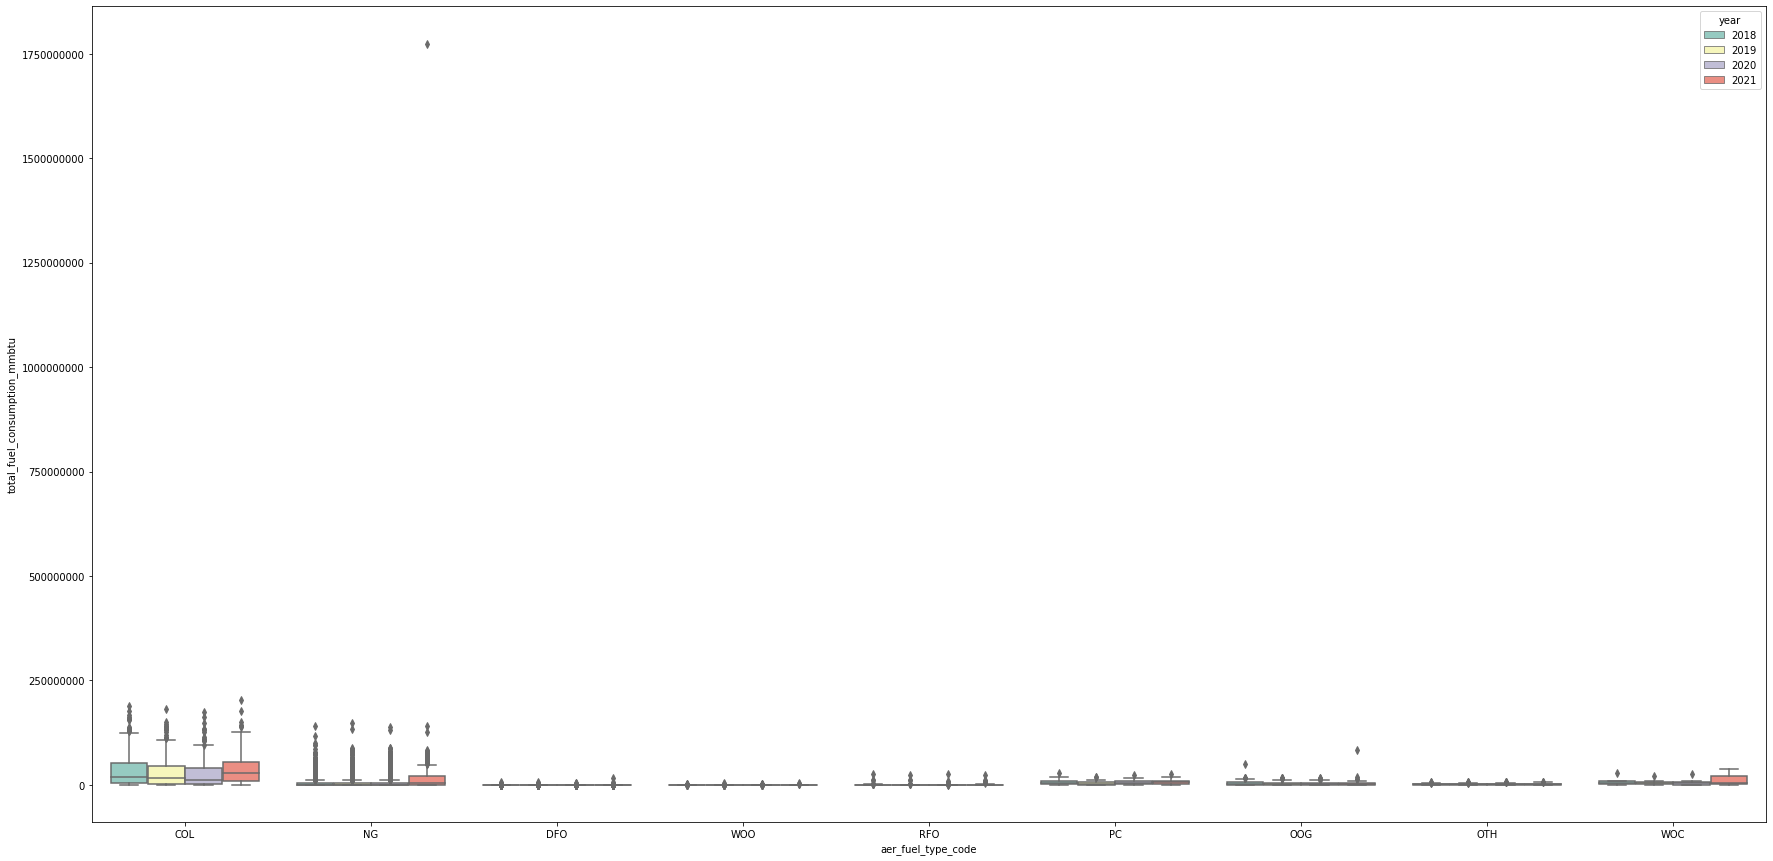

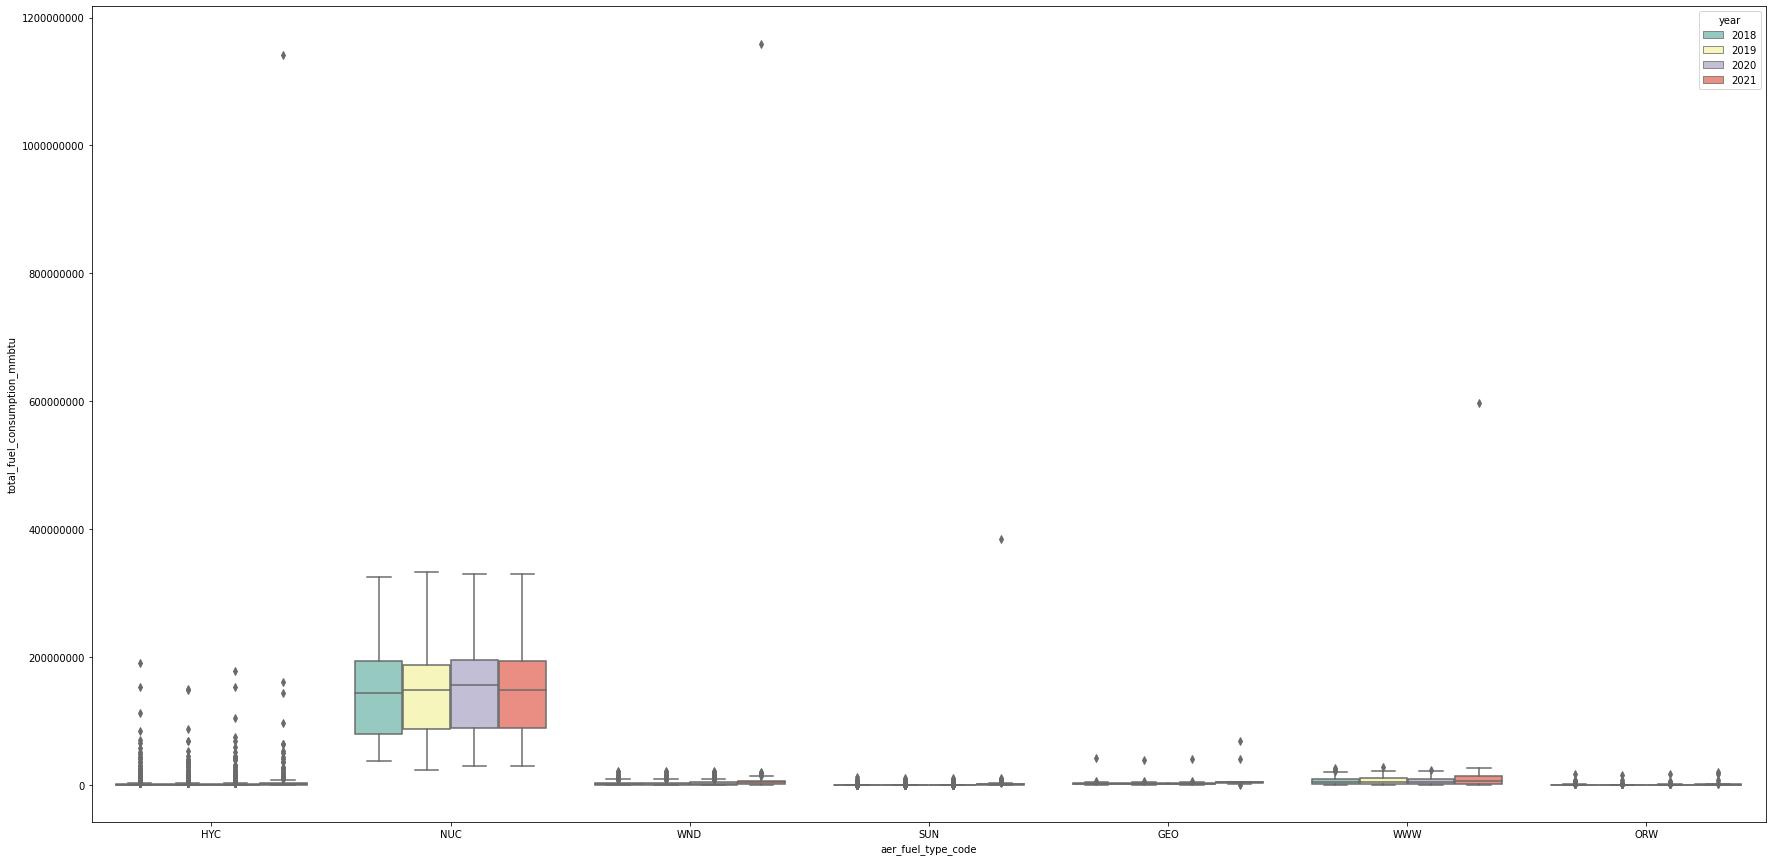

In [88]:
#total fuel consumption for each fuel type

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="total_fuel_consumption_mmbtu", hue="year",
                 data=\
                agg_gen_fuel_dataset_grouped[agg_gen_fuel_dataset_grouped["aer_fuel_type_code"].isin(nonrenewable_sources_aer)], palette="Set3")

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="total_fuel_consumption_mmbtu", hue="year",
                 data=\
                agg_gen_fuel_dataset_grouped[agg_gen_fuel_dataset_grouped["aer_fuel_type_code"].isin(renewable_sources_aer)], palette="Set3")

<AxesSubplot:xlabel='aer_fuel_type_code', ylabel='elec_fuel_consumption_mmbtu'>

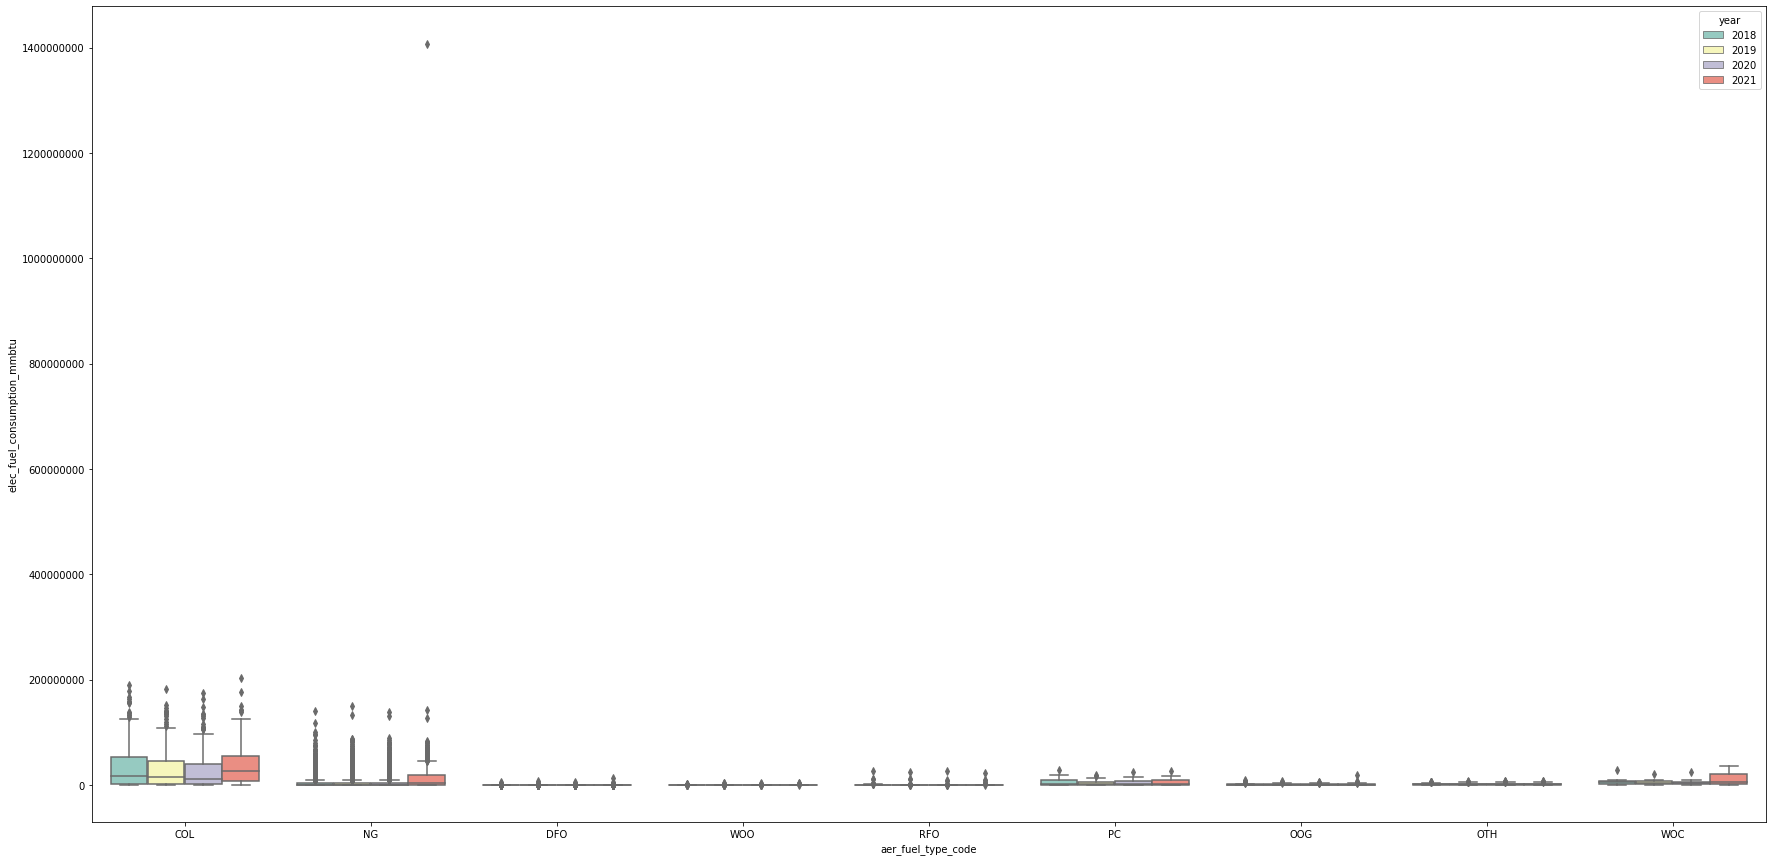

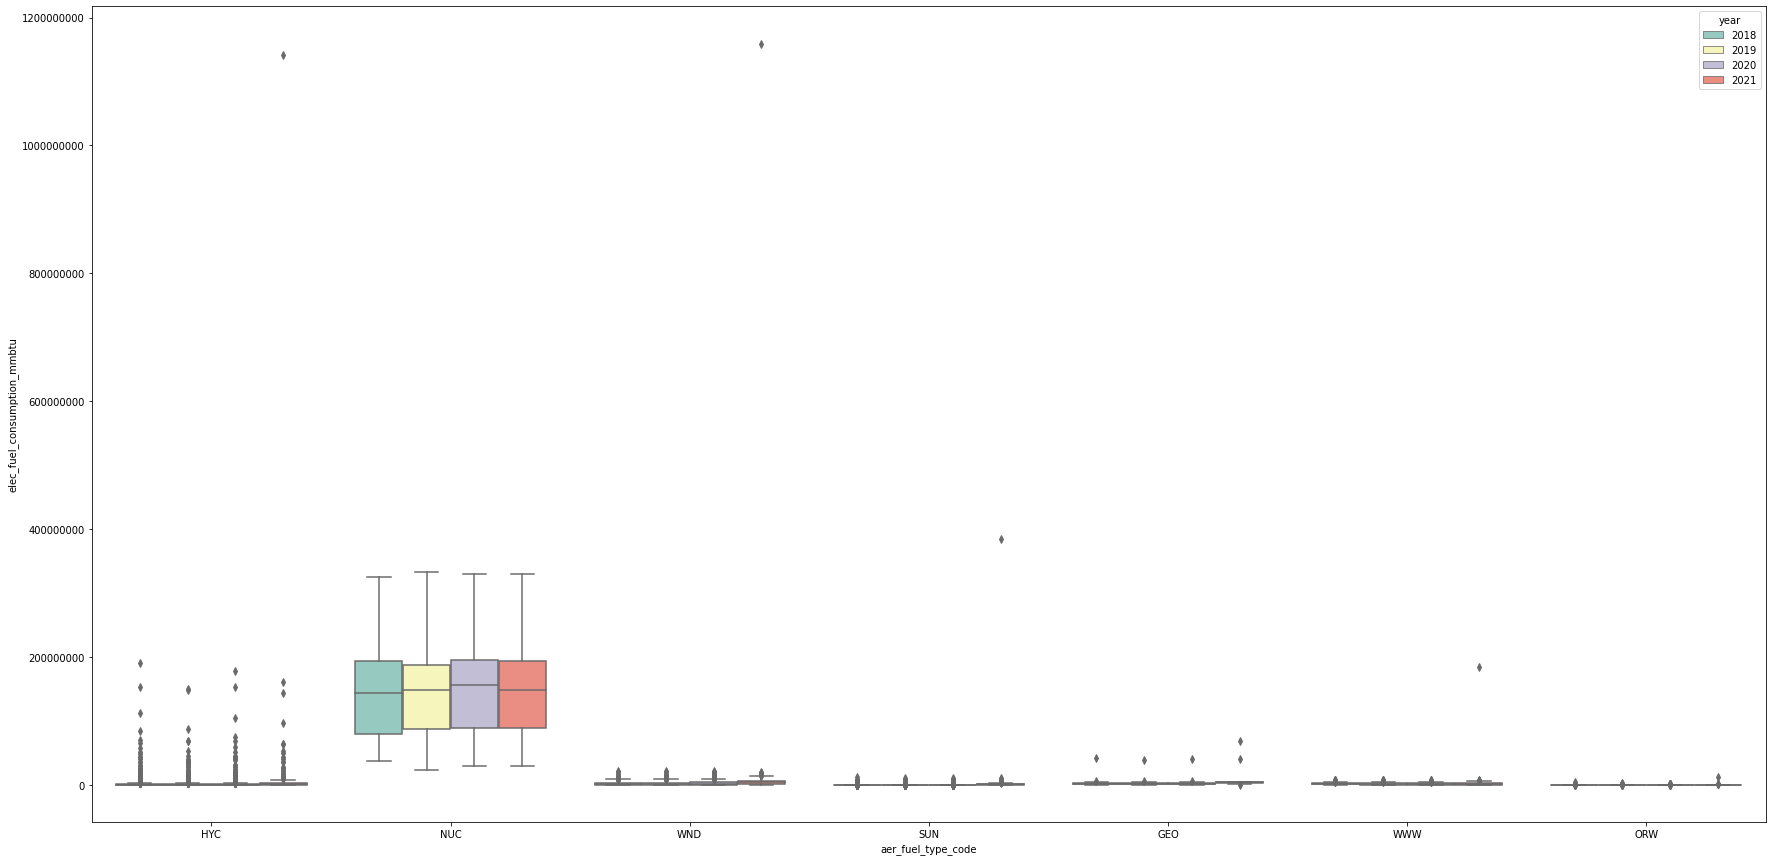

In [89]:
#Elec fuel consumption for each fuel type

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="elec_fuel_consumption_mmbtu", hue="year",
                 data=\
                agg_gen_fuel_dataset_grouped[agg_gen_fuel_dataset_grouped["aer_fuel_type_code"].isin(nonrenewable_sources_aer)], palette="Set3")

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="elec_fuel_consumption_mmbtu", hue="year",
                 data=\
                agg_gen_fuel_dataset_grouped[agg_gen_fuel_dataset_grouped["aer_fuel_type_code"].isin(renewable_sources_aer)], palette="Set3")

36143 6458


'\n#print(describe)\noutlier_range1 = ((describe1["75%"] - describe1["25%"]) * 0.5).reset_index()\noutlier_range1[1] = ((describe1["75%"] - describe1["25%"]) * 1.5).reset_index()[0]\noutlier_range1.rename(columns={0:"lower", 1:"upper"}, inplace=True)\n#print(outlier_range)\n#print(testing)\nmerge1 = pd.merge(testing, outlier_range1, on=["year", "aer_fuel_type_code"], how="inner")\nfinal1 = merge1[(merge1["aer_fuel_type_code"].isin(nonrenewable_sources_aer)) & (merge1["net_generation_(megawatthours)"] < merge1["upper"] ) & (merge1["net_generation_(megawatthours)"] > merge1["lower"])]\nprint(len(merge1), len(final1))\n\ndescribe2 = agg_gen_fuel_dataset_grouped[agg_gen_fuel_dataset_grouped["aer_fuel_type_code"].isin(renewable_sources_aer)].groupby(["year", "aer_fuel_type_code"])["net_generation_(megawatthours)"].describe()\n\n#print(describe)\noutlier_range2 = ((describe2["75%"] - describe2["25%"]) * 0.5).reset_index()\noutlier_range2[1] = ((describe2["75%"] - describe2["25%"]) * 1.5).res

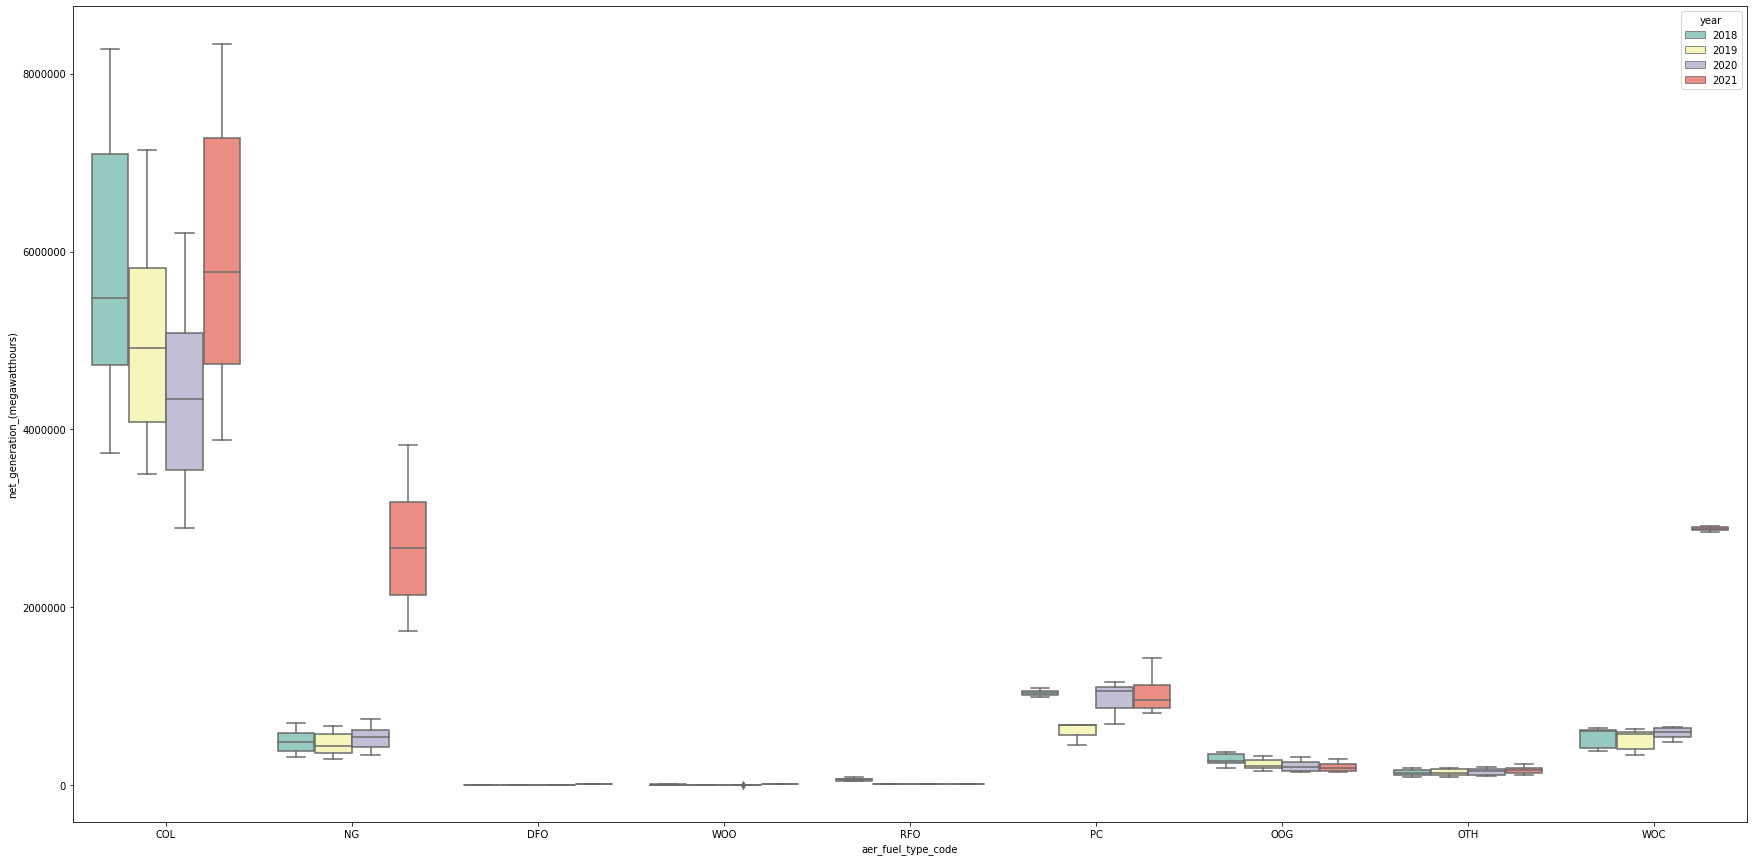

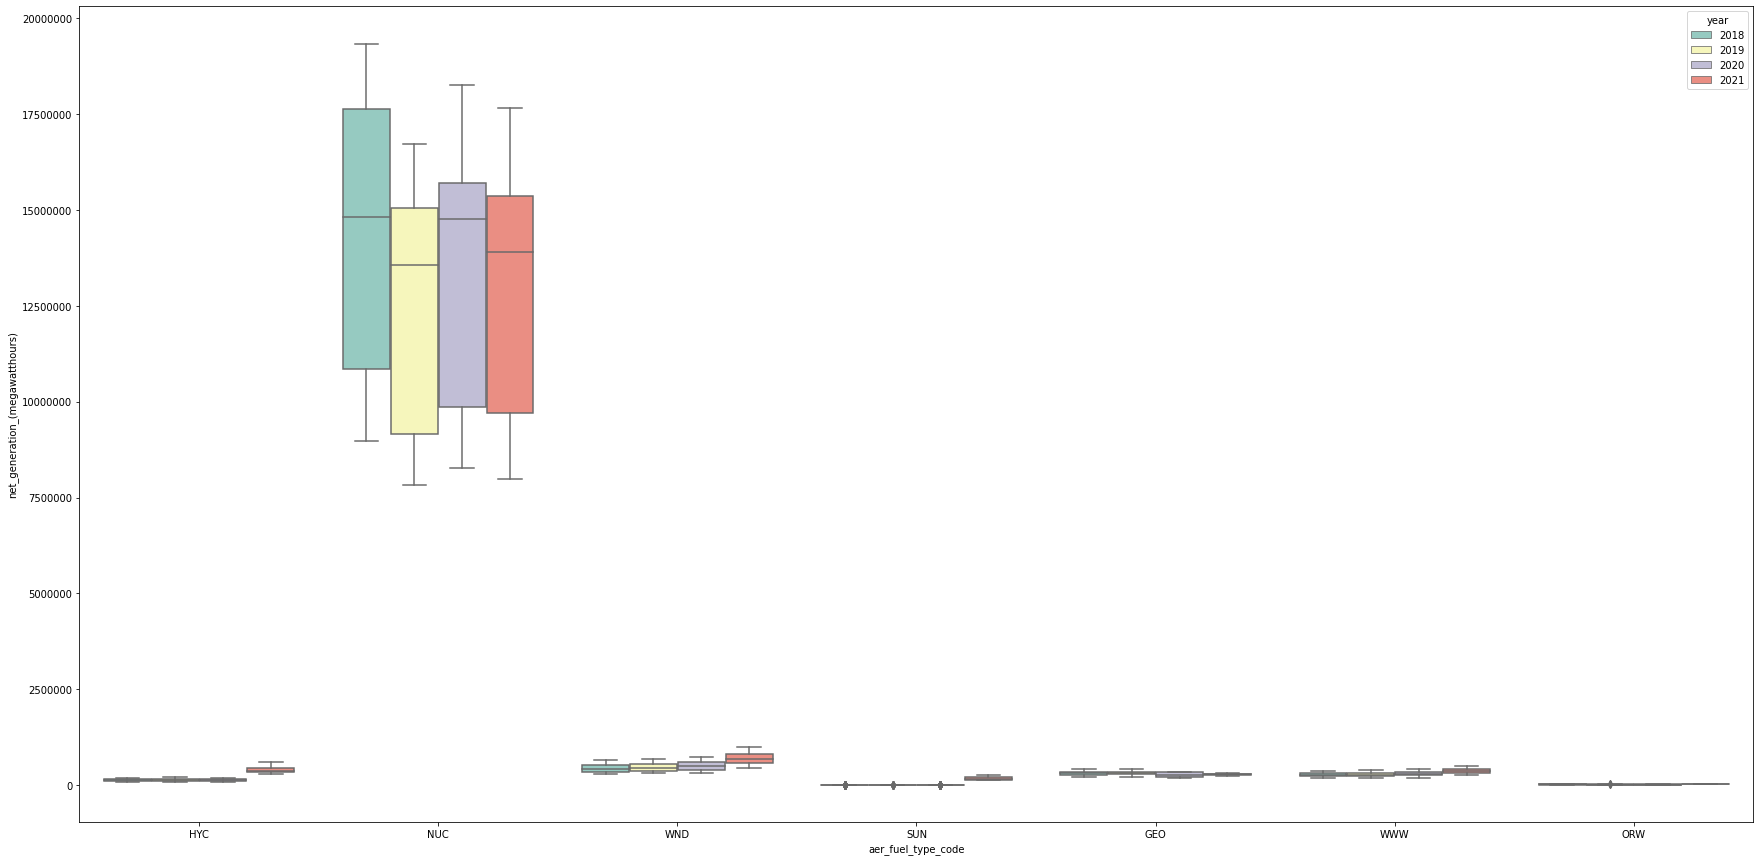

In [104]:
#Removing the outlier of the net generation column
#testing = agg_gen_fuel_dataset_grouped.copy()
#describe1 = agg_gen_fuel_dataset_grouped[agg_gen_fuel_dataset_grouped["aer_fuel_type_code"].isin(nonrenewable_sources_aer)].groupby(["year", "aer_fuel_type_code"])["net_generation_(megawatthours)"].describe()

describe1 = agg_gen_fuel_dataset_grouped.groupby(["year", "aer_fuel_type_code"])["net_generation_(megawatthours)"].describe()
outlier_range1 = ((describe1["75%"] - describe1["25%"]) * 0.8).reset_index()
outlier_range1[1] = ((describe1["75%"] - describe1["25%"]) * 1.8).reset_index()[0]
outlier_range1.rename(columns={0:"lower", 1:"upper"}, inplace=True)

merge1 = pd.merge(testing, outlier_range1, on=["year", "aer_fuel_type_code"], how="inner")
final1 = merge1[(merge1["net_generation_(megawatthours)"] < merge1["upper"] ) & (merge1["net_generation_(megawatthours)"] > merge1["lower"])]
print(len(merge1), len(final1))

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="net_generation_(megawatthours)", hue="year",
                 data=\
                final1[final1["aer_fuel_type_code"].isin(nonrenewable_sources_aer)], palette="Set3")

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.boxplot(x="aer_fuel_type_code", y="net_generation_(megawatthours)", hue="year",
                 data=\
                final1[final1["aer_fuel_type_code"].isin(renewable_sources_aer)], palette="Set3")

#print(final)

In [105]:
#Due to the class imbalance between Combined heat and thermal power plants and non combined heat and thermal power plants, linear regression was
#performed on the two classes seperately to look at each model's adjusted R-squared
# x_train, x_test, y_train, y_test = train_test_split(final.loc[final["combined_heat_and_power_plant"] == "N", ["total_fuel_consumption_mmbtu", "elec_fuel_consumption_mmbtu"]],
#                                                     final.loc[final["combined_heat_and_power_plant"] == "N", "net_generation_(megawatthours)"], test_size=0.33)
# model = LinearRegression().fit(x_train, y_train)
# print(model.score(x_test, y_test))
# model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()
# print(model1.summary())

# x_train, x_test, y_train, y_test = train_test_split(final.loc[final["combined_heat_and_power_plant"] == "Y", ["total_fuel_consumption_mmbtu", "elec_fuel_consumption_mmbtu"]],
#                                                     final.loc[final["combined_heat_and_power_plant"] == "Y", "net_generation_(megawatthours)"], test_size=0.33)
# model = LinearRegression().fit(x_train, y_train)
# print(model.score(x_test, y_test))
# model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()
# print(model1.summary())

x_train, x_test, y_train, y_test = train_test_split(final1[["total_fuel_consumption_mmbtu", "elec_fuel_consumption_mmbtu"]],
                                                    final1["net_generation_(megawatthours)"], test_size=0.33)
model = LinearRegression().fit(x_train, y_train)
print(model.score(x_test, y_test))
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model1.summary())

0.9949690425326376
                                  OLS Regression Results                                  
Dep. Variable:     net_generation_(megawatthours)   R-squared:                       0.995
Model:                                        OLS   Adj. R-squared:                  0.995
Method:                             Least Squares   F-statistic:                 4.592e+05
Date:                            Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                                    07:12:16   Log-Likelihood:                -57622.
No. Observations:                            4326   AIC:                         1.152e+05
Df Residuals:                                4323   BIC:                         1.153e+05
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                                   coef    std err          t      P>|t

In [127]:
agg_gen_fuel_dataset_grouped2 = agg_gen_fuel_dataset.groupby(["year", "plant_id", "census_region",
                            "aer_fuel_type_code"], as_index=False).agg({'net_generation_(megawatthours)':'sum', "elec_fuel_consumption_mmbtu":"sum"})#.sum(["net_generation_(megawatthours)", "total_fuel_consumption_mmbtu", "elec_fuel_consumption_mmbtu"])
print(agg_gen_fuel_dataset_grouped2)

       year  plant_id census_region aer_fuel_type_code  \
0      2018         3           ESC                COL   
1      2018         3           ESC                 NG   
2      2018         4           ESC                HYC   
3      2018         7           ESC                 NG   
4      2018         8           ESC                COL   
...     ...       ...           ...                ...   
36340  2021     99999           WSC                OTH   
36341  2021     99999           WSC                 PC   
36342  2021     99999           WSC                SUN   
36343  2021     99999           WSC                WND   
36344  2021     99999           WSC                WWW   

       net_generation_(megawatthours)  elec_fuel_consumption_mmbtu  
0                        3.634297e+06                     36907314  
1                        6.830619e+06                     48277480  
2                        6.879210e+05                      6262832  
3                        1.

In [123]:
#Too perfect of clustering

# plt.subplots(figsize=(30,15))
# plt.ticklabel_format(style='plain')
# #sns.scatterplot(data=agg_gen_fuel_dataset, x="", y="net_generation_(megawatthours)", hue="census_region")
# sns.scatterplot(data=agg_gen_fuel_dataset, x="aer_fuel_type_code", y="elec_fuel_consumption_mmbtu", hue="reported_prime_mover")
# plt.subplots(figsize=(30,15))
# plt.ticklabel_format(style='plain')
# sns.scatterplot(data=agg_gen_fuel_dataset, x="aer_fuel_type_code", y="net_generation_(megawatthours)", hue="reported_prime_mover")

<AxesSubplot:xlabel='year', ylabel='net_generation_(megawatthours)'>

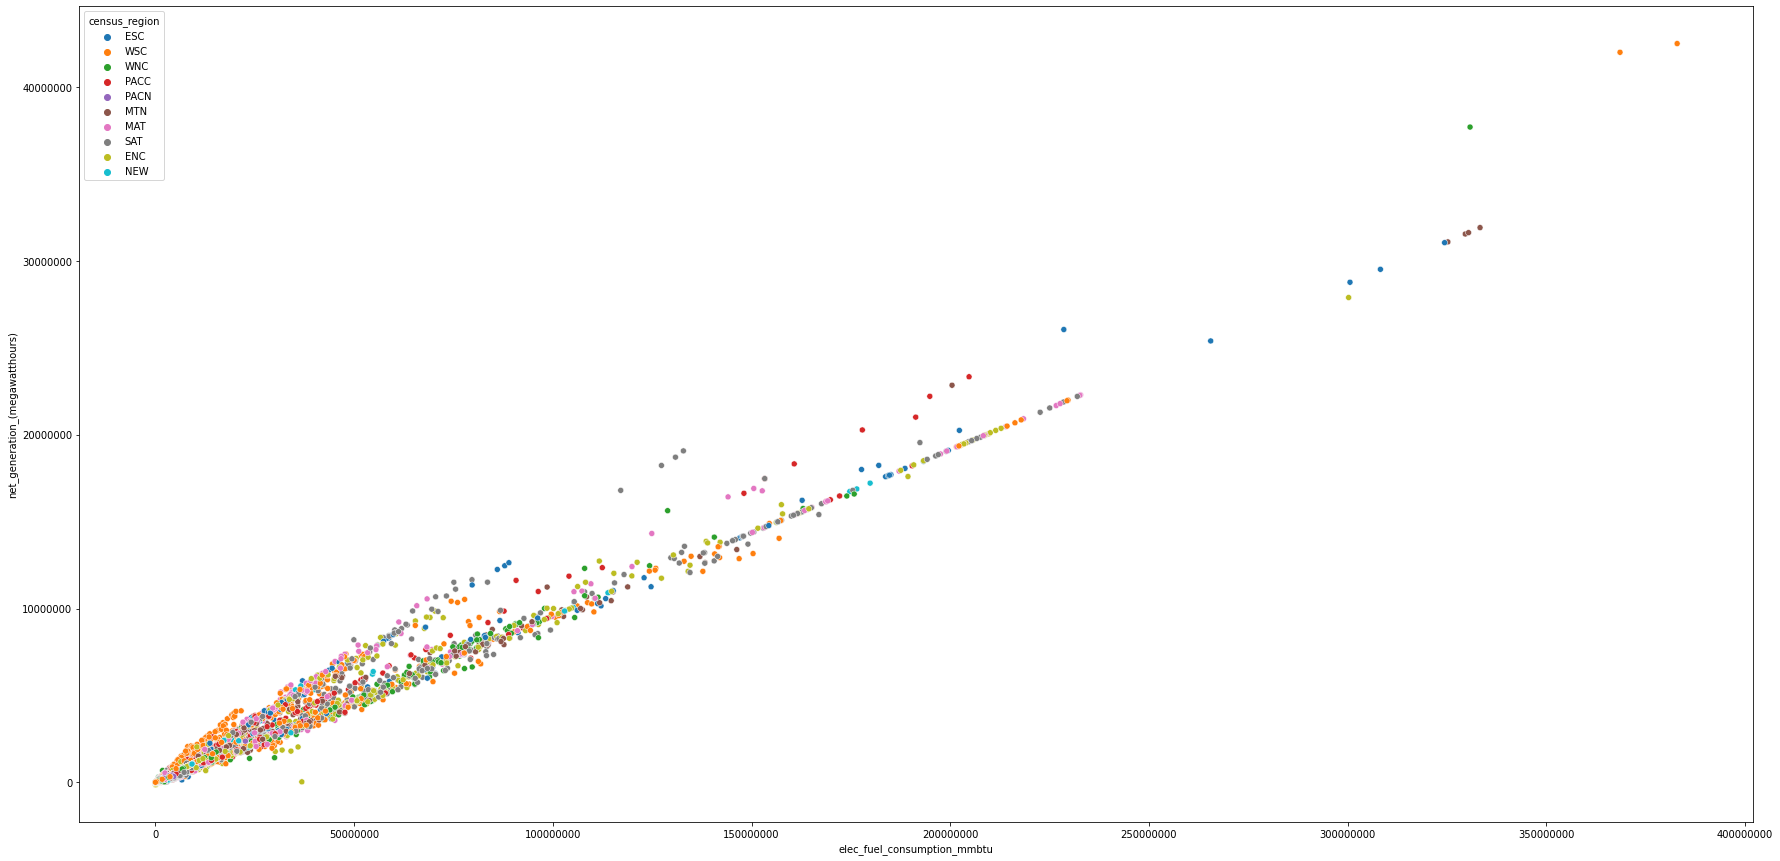

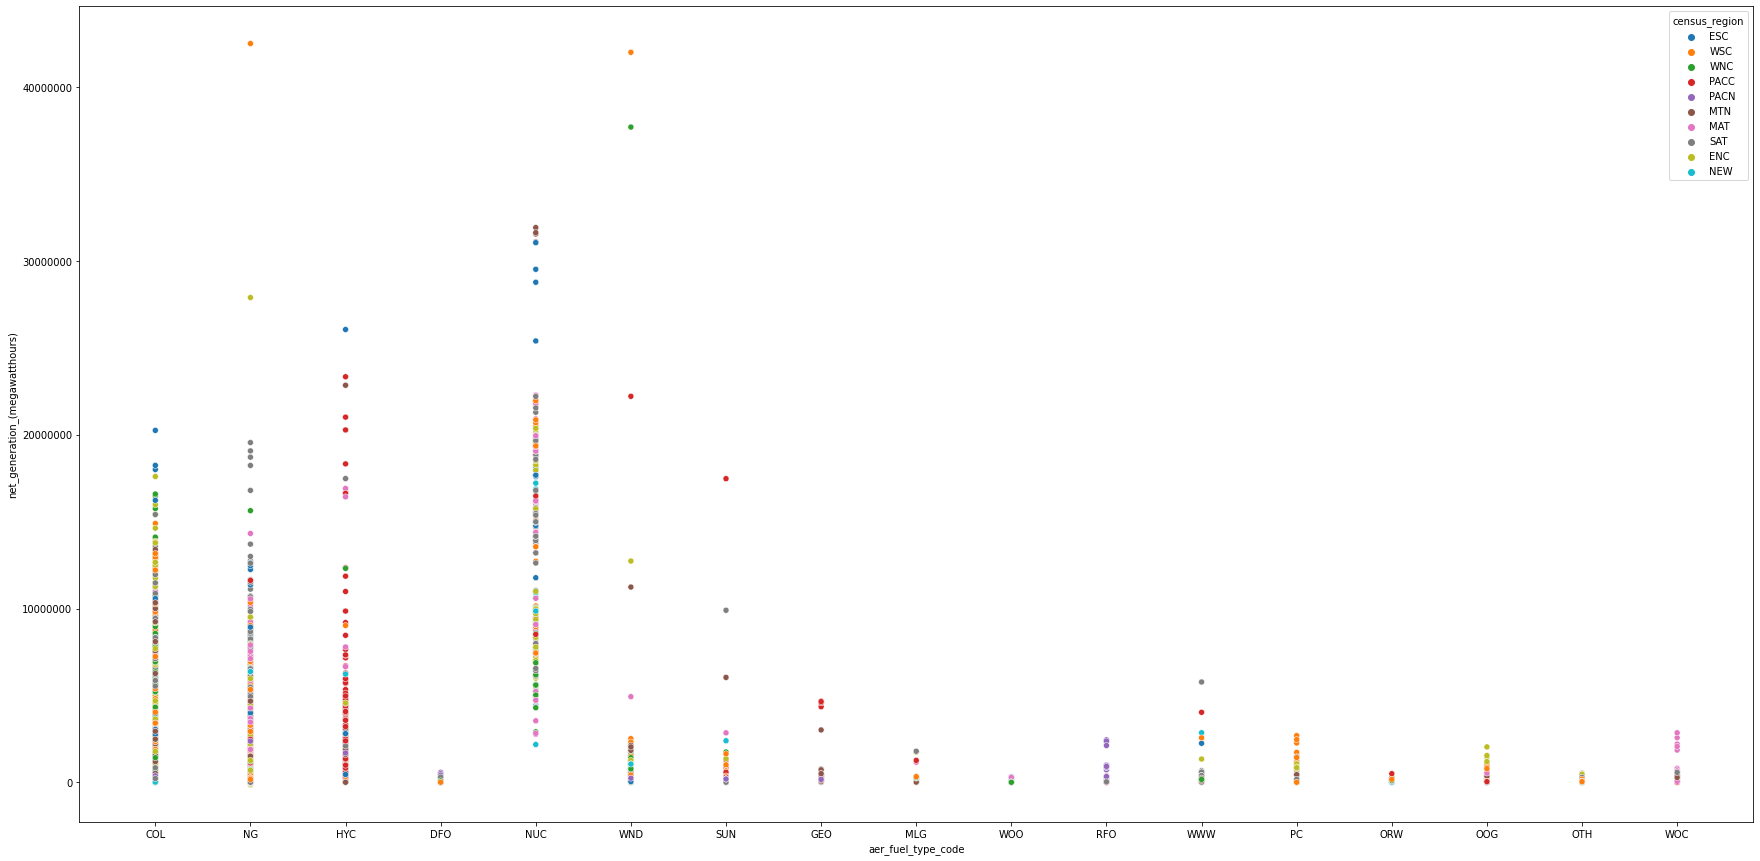

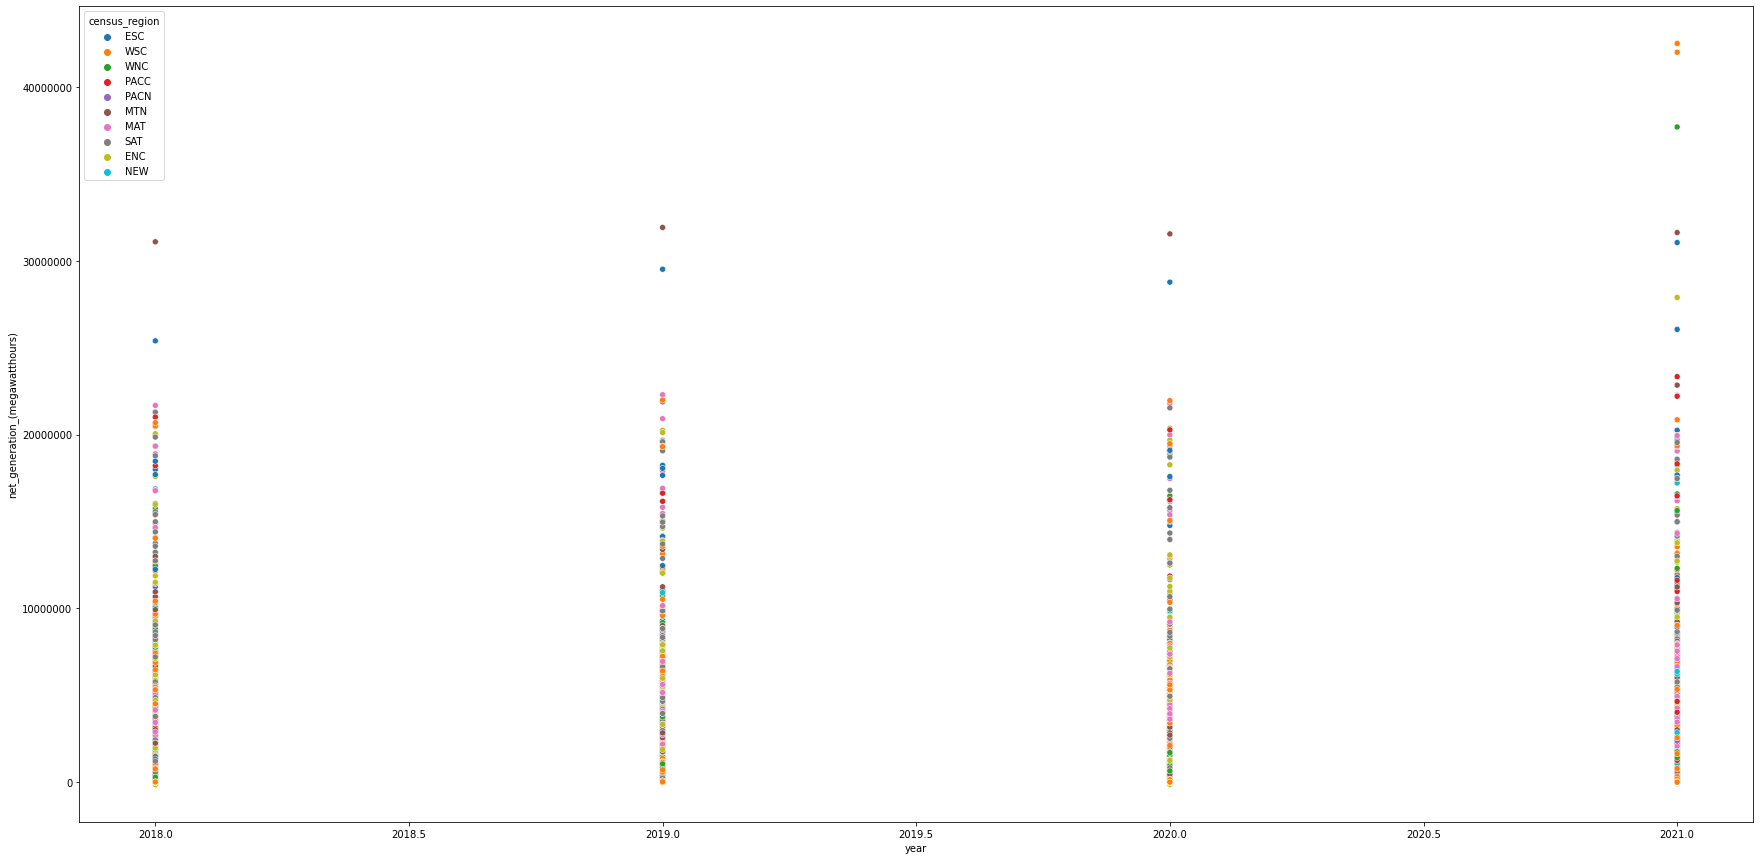

In [142]:
#Given the fuel consumption for electricity, net generation of power, and fuel type can we predict the census region/where the power plant is located?

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.scatterplot(data=agg_gen_fuel_dataset_grouped2, x="elec_fuel_consumption_mmbtu", y="net_generation_(megawatthours)", hue="census_region")

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.scatterplot(data=agg_gen_fuel_dataset_grouped2, x="aer_fuel_type_code", y="net_generation_(megawatthours)", hue="census_region")

plt.subplots(figsize=(30,15))
plt.ticklabel_format(style='plain')
sns.scatterplot(data=agg_gen_fuel_dataset_grouped2, x="year", y="net_generation_(megawatthours)", hue="census_region")

In [159]:
agg_gen_fuel_dataset_grouped2["aer_encoded"] = LabelEncoder().fit_transform(agg_gen_fuel_dataset_grouped2['aer_fuel_type_code'])
agg_gen_fuel_dataset_grouped2["census_region_encoded"] = LabelEncoder().fit_transform(agg_gen_fuel_dataset_grouped2['census_region'])

x_train1, x_test1, y_train1, y_test1 = train_test_split(agg_gen_fuel_dataset_grouped2[["aer_encoded", "net_generation_(megawatthours)", "elec_fuel_consumption_mmbtu", "year"]],
                                                    agg_gen_fuel_dataset_grouped2["census_region_encoded"], test_size=0.33)
x_train2, x_test2, y_train2, y_test2 = train_test_split(agg_gen_fuel_dataset_grouped2[["aer_encoded", "net_generation_(megawatthours)", "elec_fuel_consumption_mmbtu"]],
                                                    agg_gen_fuel_dataset_grouped2["census_region_encoded"], test_size=0.33)

In [162]:
clf1=RandomForestClassifier(n_estimators=200)

kf = KFold(n_splits=5, shuffle=True)

scores = cross_val_score(clf1, x_train1, y_train1, scoring="f1_micro", cv=kf)

print(scores)

clf1.fit(x_train1,y_train1)
y_pred1 = clf1.predict(x_test1)


[0.25087251 0.24209446 0.25071869 0.24599589 0.25564682]


In [164]:
print(metrics.f1_score(y_test1, y_pred1, average="micro"))

0.2609638152409538


In [166]:
clf2=RandomForestClassifier(n_estimators=500)

scores = cross_val_score(clf1, x_train2, y_train2, scoring="f1_micro", cv=kf)
print(scores)

clf2.fit(x_train2,y_train2)
y_pred2 = clf2.predict(x_test2)


[0.27263396 0.25995893 0.27351129 0.25954825 0.27268994]


In [167]:
print(metrics.accuracy_score(y_test2, y_pred2))

0.26905119226279806
